In [1]:
import numpy as np
import matplotlib.pyplot as plt
import caiman as cm
from caiman.motion_correction import MotionCorrect

ModuleNotFoundError: No module named 'caiman'

In [2]:
filename = '3czi'

In [3]:
movie = cm.load(filename + '.tif')

In [4]:
downsample_ratio = .2  # motion can be perceived better when downsampling in time
movie.resize(1, 1, downsample_ratio).play(q_max=99.5, fr=30, magnification=2)   # play movie (press q to exit)

In [5]:
max_shifts = (6, 6)  # maximum allowed rigid shift in pixels (view the movie to get a sense of motion)
strides =  (48, 48)  # create a new patch every x pixels for pw-rigid correction
overlaps = (24, 24)  # overlap between patches (size of patch strides+overlaps)
max_deviation_rigid = 3   # maximum deviation allowed for patch with respect to rigid shifts
pw_rigid = False  # flag for performing rigid or piecewise rigid motion correction
shifts_opencv = True  # flag for correcting motion using bicubic interpolation (otherwise FFT interpolation is used)
border_nan = 'copy'  # replicate values along the boundary (if True, fill in with NaN)

In [6]:
#if 'dview' in locals():
#    cm.stop_server(dview=dview)
#c, dview, n_processes = cm.cluster.setup_cluster(
#    backend='multiprocessing', n_processes=None, single_thread=False)

In [7]:
mc = MotionCorrect(movie, max_shifts=max_shifts,
                  strides=strides, overlaps=overlaps,
                  max_deviation_rigid=max_deviation_rigid, 
                  shifts_opencv=shifts_opencv, nonneg_movie=True,
                  border_nan=border_nan)

In [8]:
mc.motion_correct(save_movie=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.64it/s]


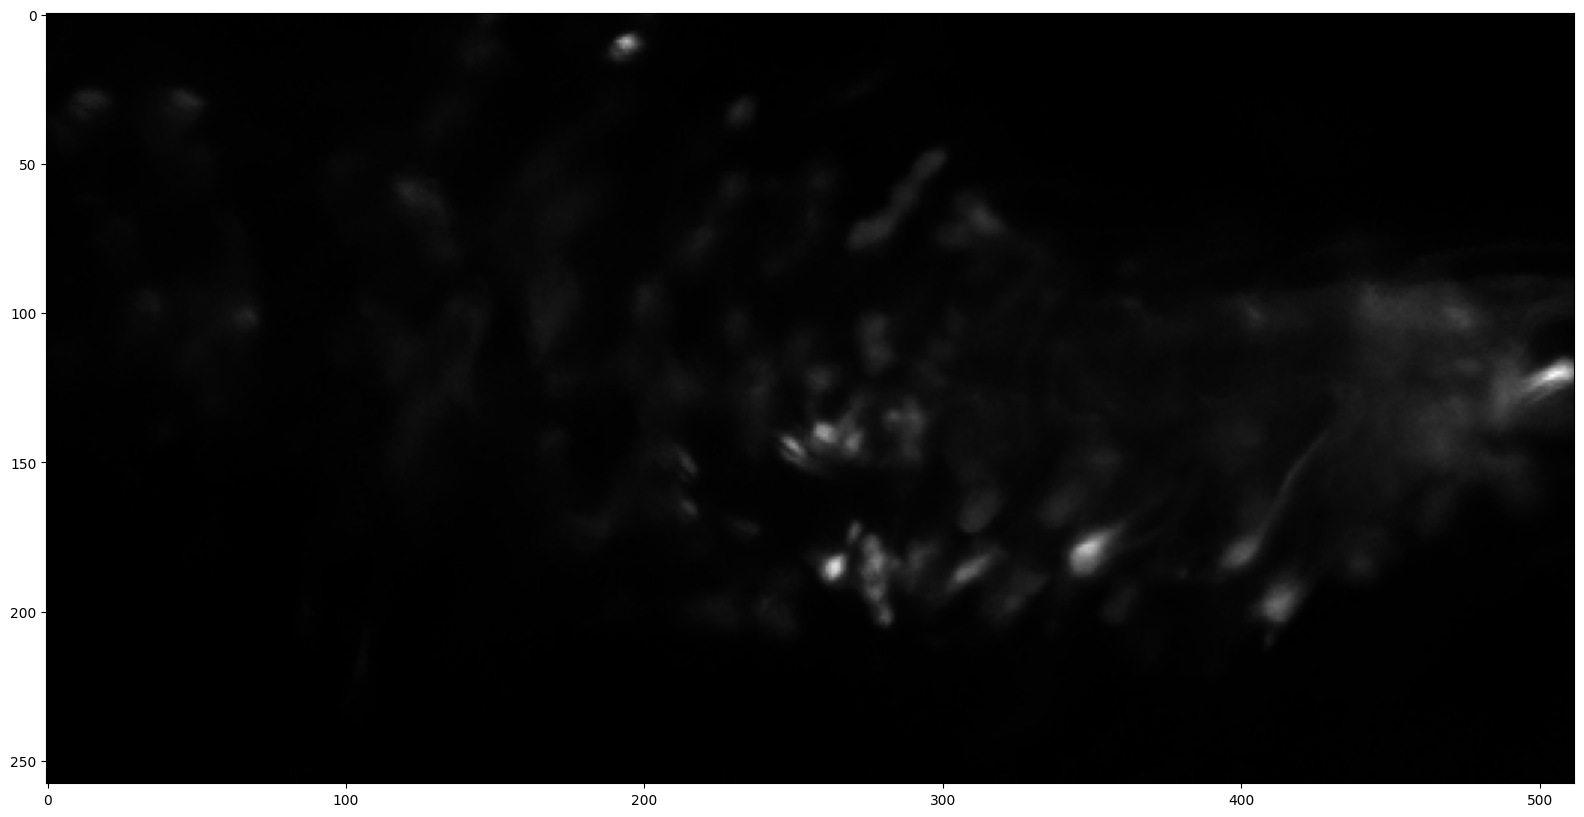

In [9]:
# load motion corrected movie
m_rig = cm.load(mc.mmap_file)
bord_px_rig = np.ceil(np.max(mc.shifts_rig)).astype(int)
##%% visualize templates
plt.figure(figsize = (20,10))
plt.imshow(mc.total_template_rig, cmap = 'gray');

In [10]:
mc.pw_rigid = True  # turn the flag to True for pw-rigid motion correction
mc.template = mc.mmap_file  # use the template obtained before to save in computation (optional)
mc.split_els = int(700/200)
mc.split_rig = int(700/200)

mc.motion_correct(save_movie=True, template=mc.total_template_rig)


In [11]:
m_els = cm.load(mc.fname_tot_els)
m_els.resize(1, 1, downsample_ratio).play(
    q_max=99.5, fr=30, magnification=2,bord_px = bord_px_rig)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.82it/s]


In [12]:
m_els.save(f'{filename}_normcorre.tif')

'C:\\Users\\morit\\caiman_data\\temp\\3czi_normcorre.tif'